In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/refs/heads/main/Wholesale.csv', index_col=0)
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


<Axes: >

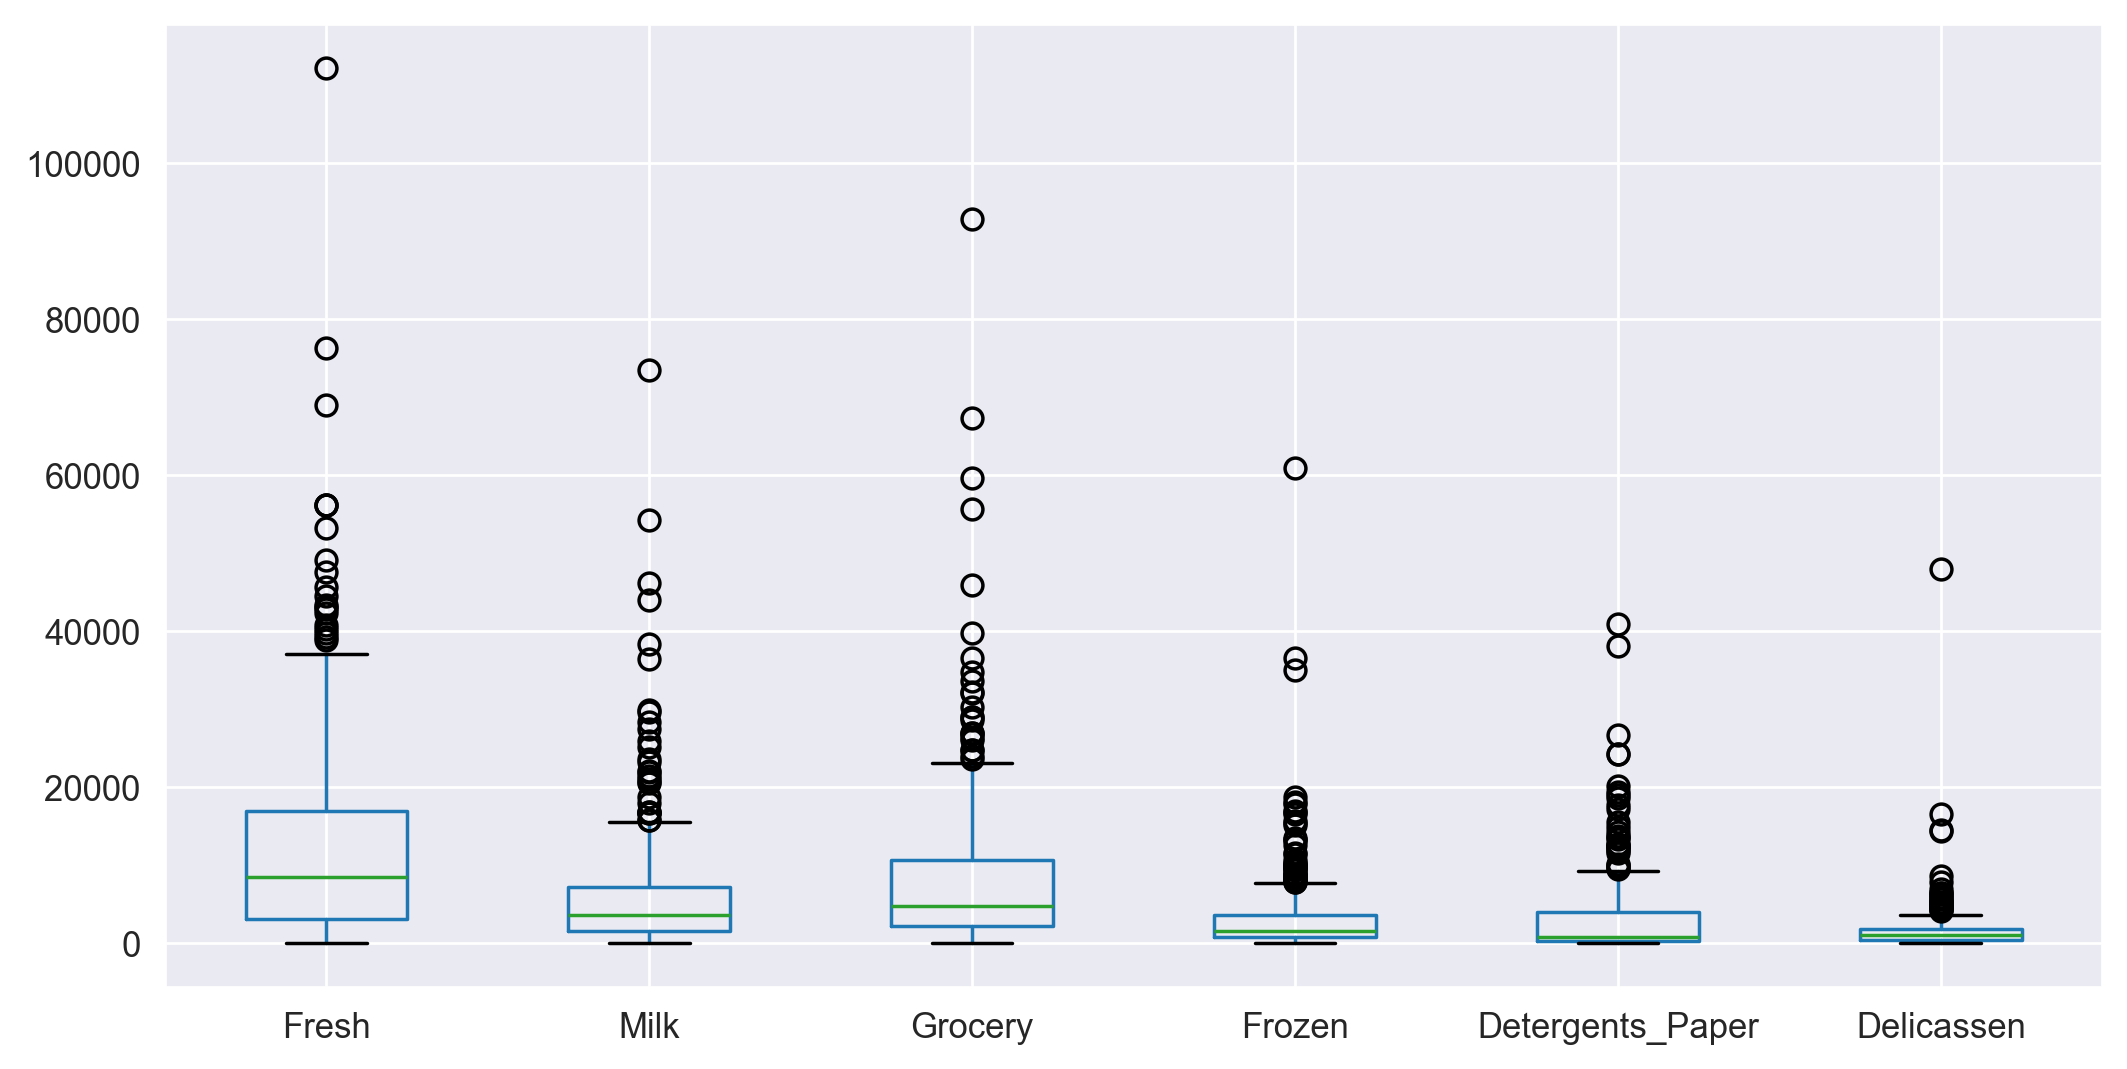

In [5]:
df.boxplot()

In [7]:
#Feature scaling
from sklearn.preprocessing import StandardScaler

In [9]:
sc= StandardScaler()

x = sc.fit_transform(df)
x

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

# Model Building

In [11]:
from sklearn.cluster import DBSCAN

In [32]:
db = DBSCAN(eps = 0.5, min_samples=3)

y = db.fit_predict(x)
y

array([ 0,  0, -1,  0, -1,  0,  0,  0,  0,  0, -1,  0, -1, -1, -1,  0,  0,
        4,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0, -1,  1,  0,  0,  0, -1,
        0,  0, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1,  0, -1,  0, -1,  0,
        0, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1, -1,  2,  0, -1,  0, -1,
       -1,  0, -1, -1, -1, -1,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0, -1,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0, -1,  0,
        0, -1,  0,  0,  0,  2,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  3, -1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
       -1,  0, -1, -1,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0,
        0, -1,  0, -1,  0,  0, -1, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,
       -1, -1,  0, -1,  0,  0, -1,  0,  0, -1,  0,  0,  0, -1, -1, -1,  0,
        0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,
        0,  0,  0,  0,  0

In [34]:
from sklearn.metrics import silhouette_score

In [36]:
silhouette_score(x,y)

-0.07329671681468523

# Hyperparameter tuning

# Selecting Min_samples:
1. Number of columns + 1
2. Number of columns * 2
3. Number of Dimension + 1
4. Always keep min_sample at least 3.

# Finding out the best eps value(K-dist Plot)
- This technique calculates the average distance between each point and its k nearest neighbors, where k is the MinPts value you selected. 
- The average k-distances are then plotted in ascending order on a k-distance graph. You’ll find the optimal value for ε at the point of maximum curvature (i.e. where the graph has the greatest slope).

In [39]:
from sklearn.neighbors import NearestNeighbors

In [41]:
neigh = NearestNeighbors(n_neighbors=3).fit(x)

In [45]:
d , i = neigh.kneighbors(x)

In [47]:
d

array([[0.        , 0.46098501, 0.49746796],
       [0.        , 0.34363739, 0.43048153],
       [0.        , 1.14424502, 1.2507466 ],
       ...,
       [0.        , 0.81088341, 1.05002533],
       [0.        , 0.30388049, 0.31430896],
       [0.        , 0.1811683 , 0.24002891]])

In [49]:
d[:,1]

array([ 0.46098501,  0.34363739,  1.14424502,  0.32193368,  0.81980385,
        0.39751095,  0.34271218,  0.30537987,  0.24101484,  0.4458863 ,
        0.55646534,  0.17770256,  0.77328812,  0.54828334,  0.52268968,
        0.2732436 ,  0.28556562,  0.40142637,  0.41860312,  0.40879483,
        0.32860237,  0.17753441,  0.89470417,  4.62909095,  1.11479524,
        0.43841226,  0.15707717,  0.22438604,  0.59907909,  0.4476474 ,
        0.46751181,  0.1824026 ,  0.21968274,  0.64405001,  0.15148845,
        0.43052164,  0.74938184,  0.6473125 ,  0.73904992,  0.94326334,
        0.89470417,  0.42189667,  0.61258339,  0.25646131,  0.37465432,
        0.59907909,  0.35686625,  2.98810434,  0.49213861,  0.85031661,
        0.42610885,  0.28516416,  0.59069346,  0.36592169,  0.23609377,
        0.24101484,  1.47278754,  0.3115813 ,  0.14276283,  0.38982995,
        0.32737667,  2.98810434,  0.55346622,  0.33415256,  0.29519664,
        2.13347136,  0.19710987,  0.54828334,  0.57848917,  0.18

In [51]:
distance = np.sort(d[:,1])
distance

array([ 0.04438185,  0.04438185,  0.05323769,  0.05323769,  0.05967886,
        0.05967886,  0.06628148,  0.06628148,  0.07562688,  0.07562688,
        0.0906001 ,  0.0906001 ,  0.09573517,  0.09573517,  0.09708669,
        0.09708669,  0.09820424,  0.1138444 ,  0.1138444 ,  0.11524265,
        0.12722269,  0.12765414,  0.12765414,  0.13150813,  0.13150813,
        0.13419437,  0.13419437,  0.13861662,  0.13861662,  0.1417839 ,
        0.14276283,  0.14276283,  0.14585635,  0.15148845,  0.15148845,
        0.15208043,  0.15208043,  0.15230804,  0.15230804,  0.15392478,
        0.15392478,  0.15504455,  0.15504455,  0.15678346,  0.15678346,
        0.15682751,  0.15707717,  0.15707717,  0.15738395,  0.16092861,
        0.16095334,  0.16095334,  0.16251017,  0.16525716,  0.16525716,
        0.16645012,  0.16752299,  0.16869486,  0.16970611,  0.17213295,
        0.17237405,  0.17237405,  0.17322549,  0.17322549,  0.17753441,
        0.17770256,  0.17770256,  0.17835467,  0.17889164,  0.18

Text(0.5, 1.0, 'K-Distance Graph')

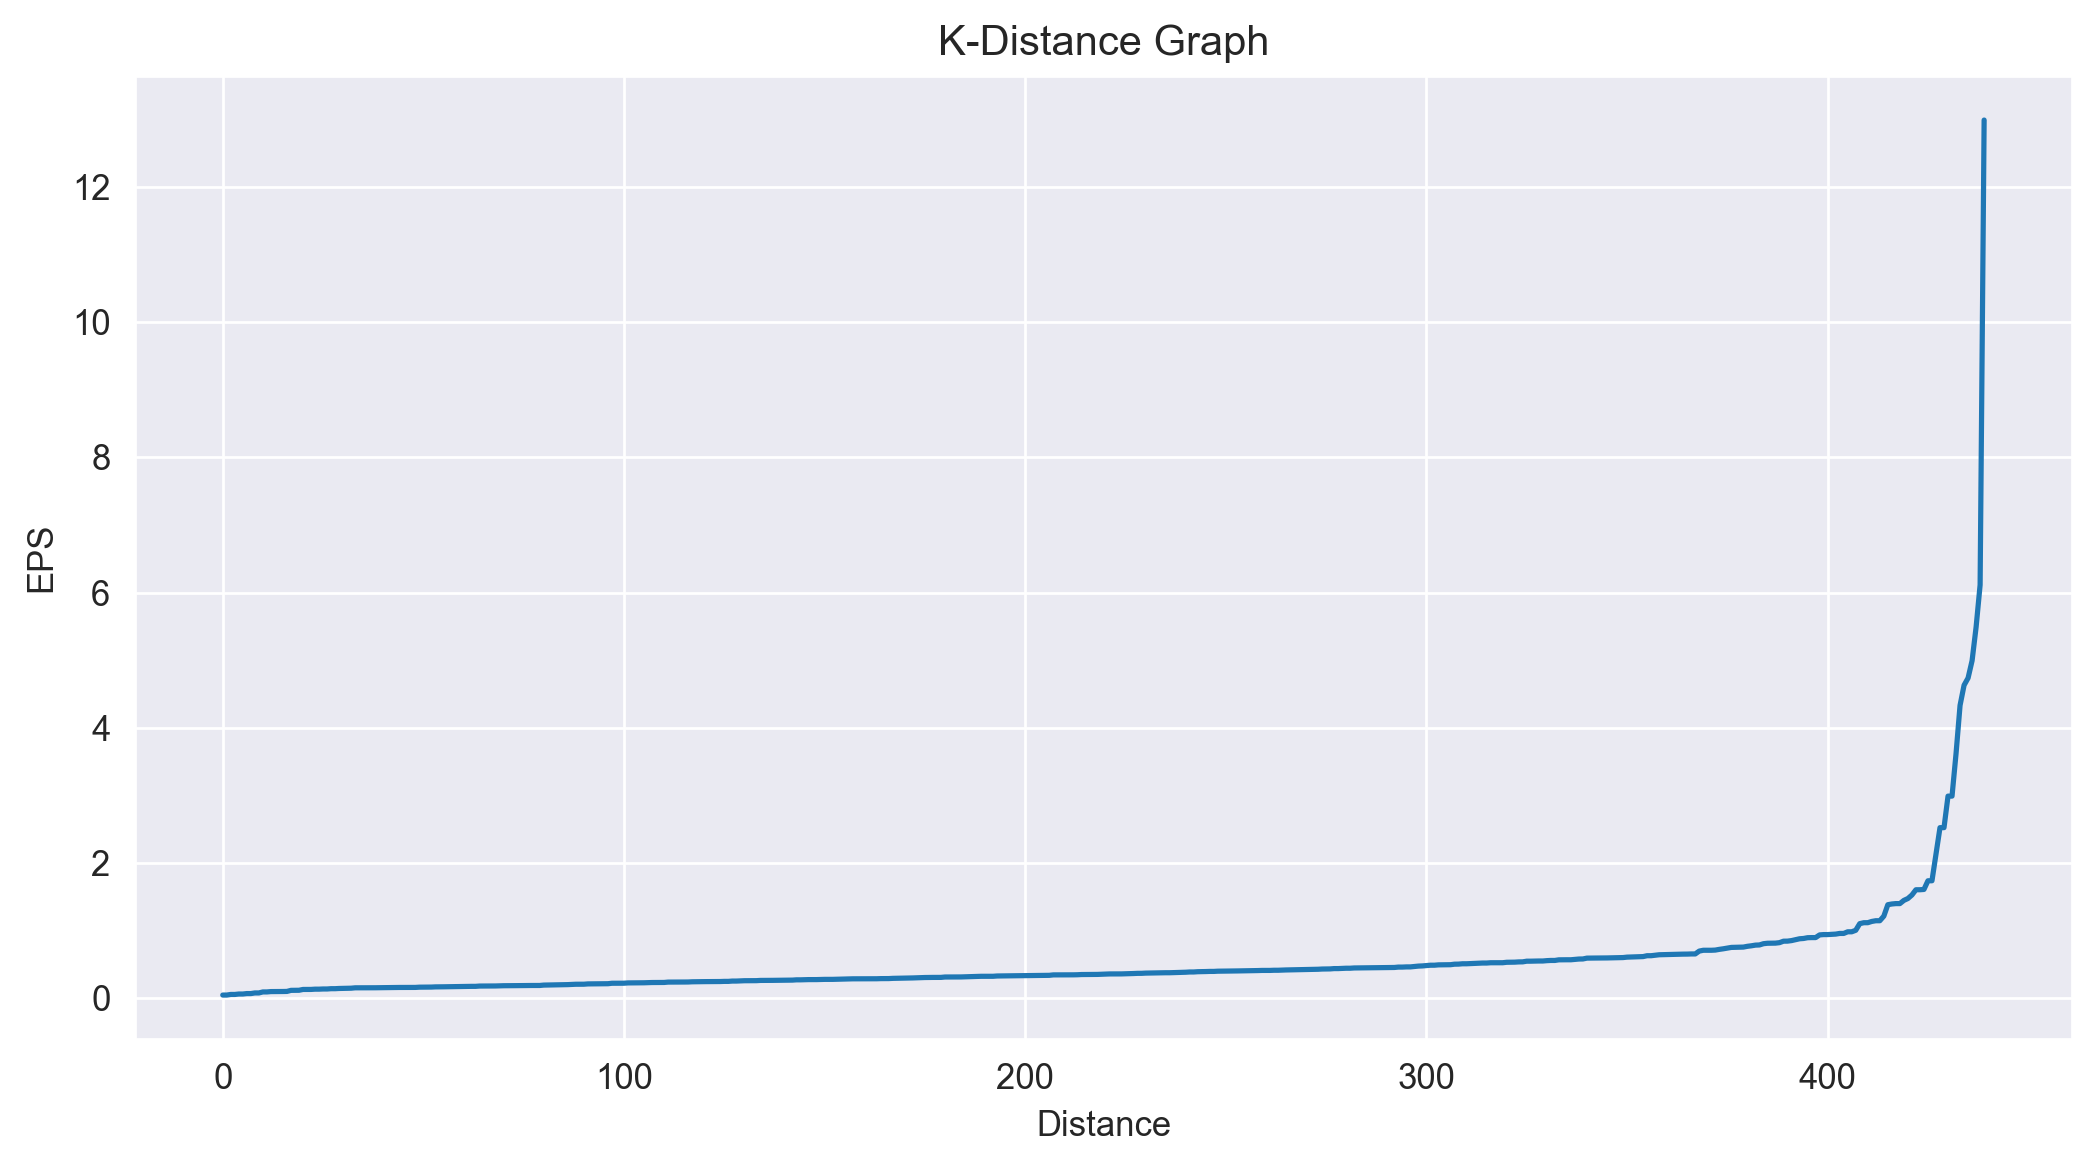

In [53]:
plt.plot(distance)
plt.xlabel('Distance')
plt.ylabel('EPS')
plt.title('K-Distance Graph')

# Evalute the model

In [68]:
db = DBSCAN(eps=2, min_samples=3)
yp = db.fit_predict(x)
yp

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [70]:
silhouette_score(x,yp)

0.7486988127438182

In [ ]:
#Analyze the clusters

In [72]:
df['Cluster'] = yp

In [74]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0
436,39228,1431,764,4510,93,2346,0
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,0


In [76]:
df.groupby('Cluster').agg('mean')

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
-1,31466.000000,28802.076923,35259.461538,13785.538462,14670.846154,9624.076923
0,11407.665105,5095.854801,7119.880562,2745.756440,2522.566745,1278.290398
